# Geração de Mapa de Calor de Zonas Eleitorais de Doutor Pedrinho
<i> Giulio Giovanella
    
## FURB - Ciência da Computação
### Ciência de dados 2020/2
#### Professor: Aurélio Faustino Hoppe

In [31]:
import time
from selenium import webdriver
import logging
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [3]:
#necessário fazer o download do chromedriver correspondente a versão do chrome instalada na sua máquina
#e ajustar o enreço local para o chromedriver
driver = webdriver.Chrome('C:\\Users\\giuliog\Documents\\webdrivers\\chromedriver_87.0.4280.66.exe')

#acessando a página pela sua URL
#a URL já contém os filtros aplicados para as zonas eleitorais do município de Doutor Pedrinho
driver.get('http://apps.tre-sc.jus.br/site/fileadmin/arquivos/eleicoes/estatistica_eleitoral/estat_offline/LocaisVotacao/MunicLocaisVotacao/MunicLocaisVotacao80080.htm')

#esperando carregar a página
time.sleep(10)

#obtenção da tabela
tableWE = driver.find_element_by_xpath("//table[@class = 'appDataTable'][1]")

In [4]:
#obtendo o conteúdo HTML da tabela
html_content = tableWE.get_attribute('outerHTML')
soup = BeautifulSoup(html_content, 'html.parser')
tableSOUP = soup.find(name='table')
#convertendo HTML para Pandas Data Frame
df_full = pd.read_html(str(tableSOUP))[0]
df_full

,0,1,2,3,4,5,6
0,Nº Local,Local,Z.E.,Endereço,CEP,Seções(Eleitores),Total de Eleitores
1,1015,NÚCLEO EDUCACIONAL FRITZ DONNER,32,"RUA DA GLÓRIA, N. 236 - SALTO DONNER - 47 3388...",89126000,"20(290), 139(290)",580
2,1023,UNIDADE DE EDUCAÇÃO INFANTIL CHAPEUZINHO VERMELHO,32,"RUA NAVEGANTES, 54 - NOVA RODEIO - 47 3388 0919",89126000,"21(290), 153(140)",430
3,1031,ESCOLA DE EDUCAÇÃO BÁSICA FREI LUCÍNIO KORTE,32,"RUA SANTA CATARINA, 416 - CENTRO - 47 33993045",89126000,"26(340), 27(336), 28(333), 29(336), 125(336)",1.681
4,1066,UNIDADE DE EDUCAÇÃO INFANTIL FREI ANTÔNIO CARL...,32,"ESTRADA GERAL FORCAÇÃO, 14490 - FORCAÇÃO - 47 ...",89126000,"30(138), 31(135)",273


In [37]:
#acessando o primeiro endereço
df_full[3][1]

'RUA DA GLÓRIA, N. 236 - SALTO DONNER - 47 3388 0410'

In [24]:
#definindo função para remover o telefone ao final dos endereços
city_name = "Doutor Pedrinho"
def adressFit(adress):
    adress_lenght = len(adress) - 1
    for i in range(adress_lenght, 0, -1):
        if adress[i] == "-":
            return adress[0:i-1].strip() + " - " + city_name

In [20]:
#escreva nesse arquivo a chave primária da conta do azure maps
chave_primaria_azure_maps = open("chave.txt", "r").read()

In [25]:
#teste adressFit 
print(adressFit("RUA DA GLÓRIA, N. 236 - SALTO DONNER - 47 3388 0410"))

RUA DA GLÓRIA, N. 236 - SALTO DONNER - Doutor Pedrinho


In [29]:
base_req_url = "https://atlas.microsoft.com/search/address/json?"
api_version = "1.0"
language = "pt-BR"
def queryArgumentBuild(argument, value, lastArgument = False):
    return argument + "=" + value + ("" if lastArgument else "&")
def buildQuery(search_argument):
    req_build = base_req_url + queryArgumentBuild("subscription-key", chave_primaria_azure_maps)
    req_build += queryArgumentBuild("api-version", api_version)
    req_build += queryArgumentBuild("language", language)
    req_build += queryArgumentBuild("query", adressFit(search_argument), True)
    return req_build

testQuery = buildQuery("RUA DA GLÓRIA, N. 236 - SALTO DONNER - 47 3388 0410")
testQuery

'https://atlas.microsoft.com/search/address/json?subscription-key=YQ1NrDRpA0LPGZRAZfeZecYBnwgui2fvZcTiok7W8co&api-version=1.0&language=pt-BR&query=RUA DA GLÓRIA, N. 236 - SALTO DONNER - Doutor Pedrinho'

In [30]:
#teste requisição azure maps
req = requests.get(testQuery)
req.text

'{"summary":{"query":"rua da glória n 236 salto donner doutor pedrinho","queryType":"NON_NEAR","queryTime":451,"numResults":10,"offset":0,"totalResults":287,"fuzzyLevel":2},"results":[{"type":"Address Range","id":"BR/ADDR/p0/18845973","score":11.0520553589,"address":{"streetNumber":"236","streetName":"Rua da Glória","municipality":"Doutor Pedrinho","countrySubdivision":"Santa Catarina","postalCode":"89126","extendedPostalCode":"89126-000","countryCode":"BR","country":"Brasil","countryCodeISO3":"BRA","freeformAddress":"Rua da Glória 236, 89126-000, Doutor Pedrinho","localName":"Doutor Pedrinho"},"position":{"lat":-26.75138,"lon":-49.45722},"viewport":{"topLeftPoint":{"lat":-26.75133,"lon":-49.45721},"btmRightPoint":{"lat":-26.75236,"lon":-49.45717}},"addressRanges":{"rangeLeft":"344 - 230","from":{"lat":-26.75236,"lon":-49.45721},"to":{"lat":-26.75133,"lon":-49.45717}}},{"type":"Address Range","id":"BR/ADDR/p0/3809159","score":10.679028511,"address":{"streetNumber":"236","streetName":"R

In [49]:
req.json()

{'summary': {'query': 'rua da glória n 236 salto donner doutor pedrinho',
  'queryType': 'NON_NEAR',
  'queryTime': 451,
  'numResults': 10,
  'offset': 0,
  'totalResults': 287,
  'fuzzyLevel': 2},
 'results': [{'type': 'Address Range',
   'id': 'BR/ADDR/p0/18845973',
   'score': 11.0520553589,
   'address': {'streetNumber': '236',
    'streetName': 'Rua da Glória',
    'municipality': 'Doutor Pedrinho',
    'countrySubdivision': 'Santa Catarina',
    'postalCode': '89126',
    'extendedPostalCode': '89126-000',
    'countryCode': 'BR',
    'country': 'Brasil',
    'countryCodeISO3': 'BRA',
    'freeformAddress': 'Rua da Glória 236, 89126-000, Doutor Pedrinho',
    'localName': 'Doutor Pedrinho'},
   'position': {'lat': -26.75138, 'lon': -49.45722},
   'viewport': {'topLeftPoint': {'lat': -26.75133, 'lon': -49.45721},
    'btmRightPoint': {'lat': -26.75236, 'lon': -49.45717}},
   'addressRanges': {'rangeLeft': '344 - 230',
    'from': {'lat': -26.75236, 'lon': -49.45721},
    'to': {'

In [53]:
req.json().get("results")[0].get("position")

{'lat': -26.75138, 'lon': -49.45722}

In [54]:
#obtida a latitude
req.json().get("results")[0].get("position").get("lat")

-26.75138

In [65]:
#automatizando o processo para os dados vindos do data frame
lats = ["Latitude"]
lons = ["Longitude"]
geocodes = []
electoral_zones_len = len(df_full)
for i in range(1, electoral_zones_len):
    adress_search_argument = df_full[3][i]
    req_azure = requests.get(buildQuery(adress_search_argument))
    lat = req_azure.json().get("results")[0].get("position").get("lat")
    lon = req_azure.json().get("results")[0].get("position").get("lon")
    lats.append(lat)
    lons.append(lon)
    geocodes.append([lat, lon])

df_full["lat"] = lats
df_full["lon"] = lons
df_full

,0,1,2,3,4,5,6,lat,lon
0,Nº Local,Local,Z.E.,Endereço,CEP,Seções(Eleitores),Total de Eleitores,Latitude,Longitude
1,1015,NÚCLEO EDUCACIONAL FRITZ DONNER,32,"RUA DA GLÓRIA, N. 236 - SALTO DONNER - 47 3388...",89126000,"20(290), 139(290)",580,-26.7514,-49.4572
2,1023,UNIDADE DE EDUCAÇÃO INFANTIL CHAPEUZINHO VERMELHO,32,"RUA NAVEGANTES, 54 - NOVA RODEIO - 47 3388 0919",89126000,"21(290), 153(140)",430,-26.7595,-49.4772
3,1031,ESCOLA DE EDUCAÇÃO BÁSICA FREI LUCÍNIO KORTE,32,"RUA SANTA CATARINA, 416 - CENTRO - 47 33993045",89126000,"26(340), 27(336), 28(333), 29(336), 125(336)",1.681,-26.7181,-49.4823
4,1066,UNIDADE DE EDUCAÇÃO INFANTIL FREI ANTÔNIO CARL...,32,"ESTRADA GERAL FORCAÇÃO, 14490 - FORCAÇÃO - 47 ...",89126000,"30(138), 31(135)",273,-13.6485,-41.8431


In [72]:
#gerando mapa de calor
import folium
from folium.plugins import HeatMap
import os
import numpy as np

a = np.matrix(geocodes)
dfa = pd.DataFrame(a)

m = folium.Map([-26.7924336,-49.2974989], tiles='stamentoner', zoom_start=6)

HeatMap(dfa).add_to(m)

#mapa salvo no arquivo Heatmap.html
m.save('Heatmap.html')

#a quarta zona eleitoral de enreço  ESTRADA GERAL FORCAÇÃO, 14490 - FORCAÇÃO está caindo na Bahia

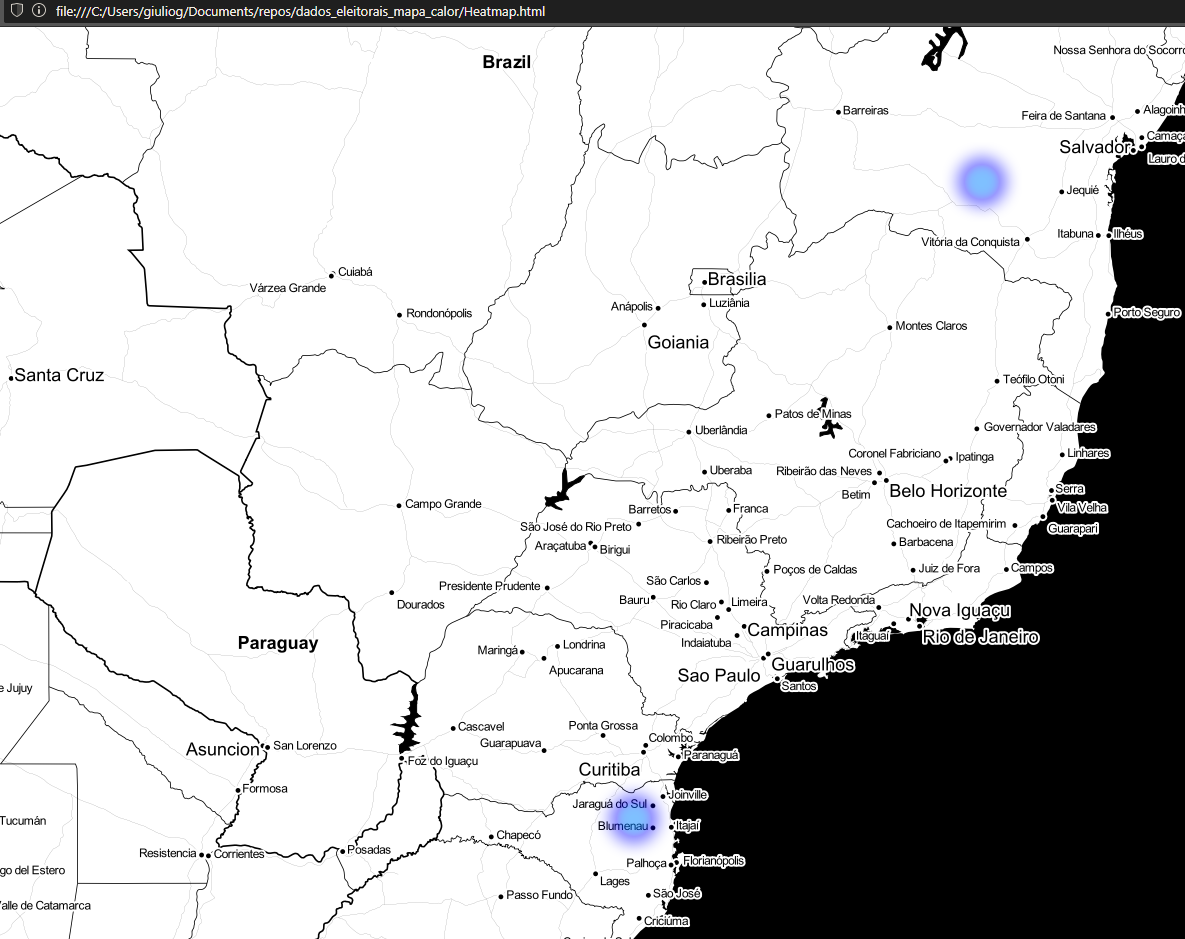


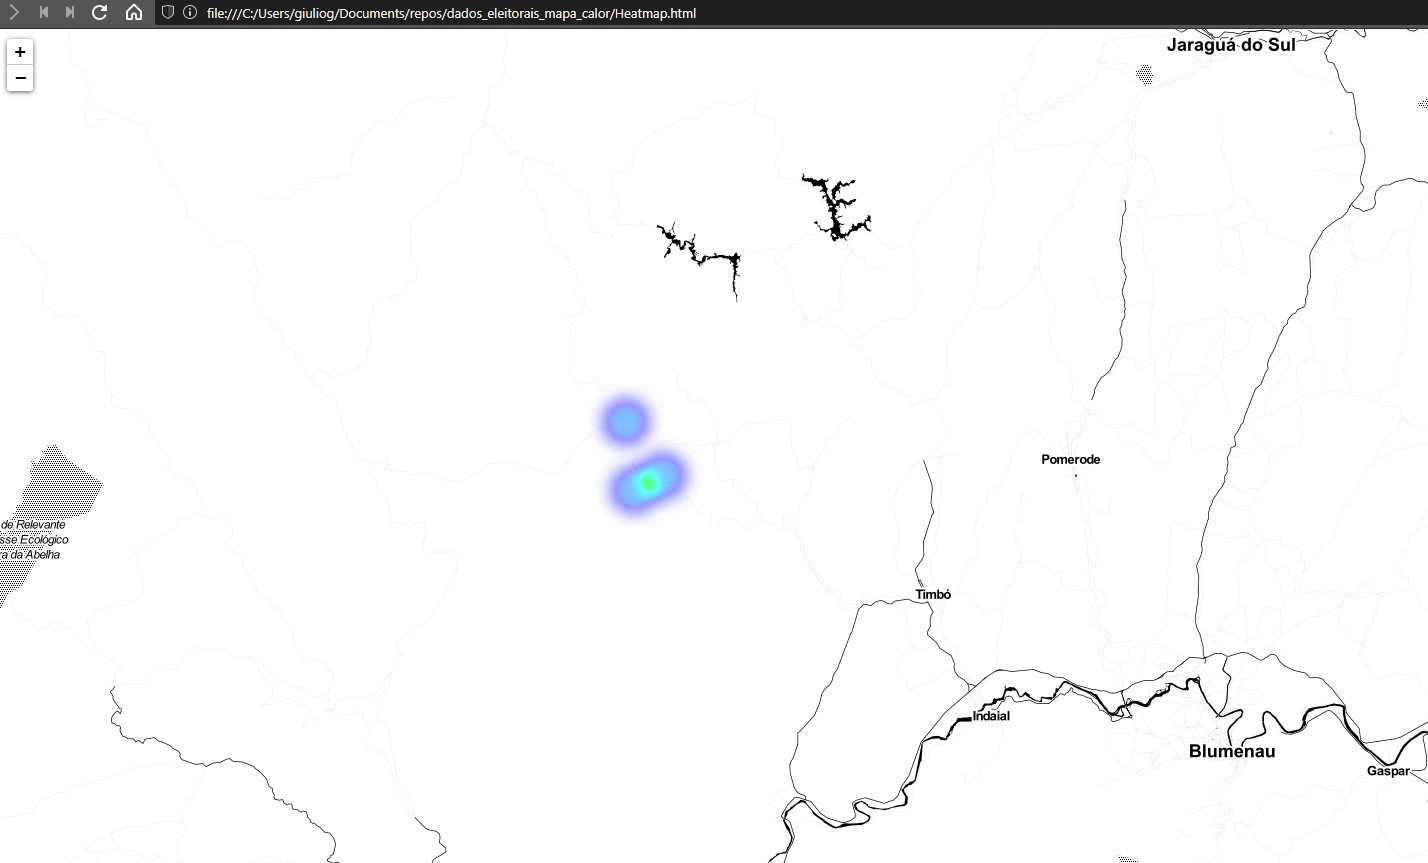

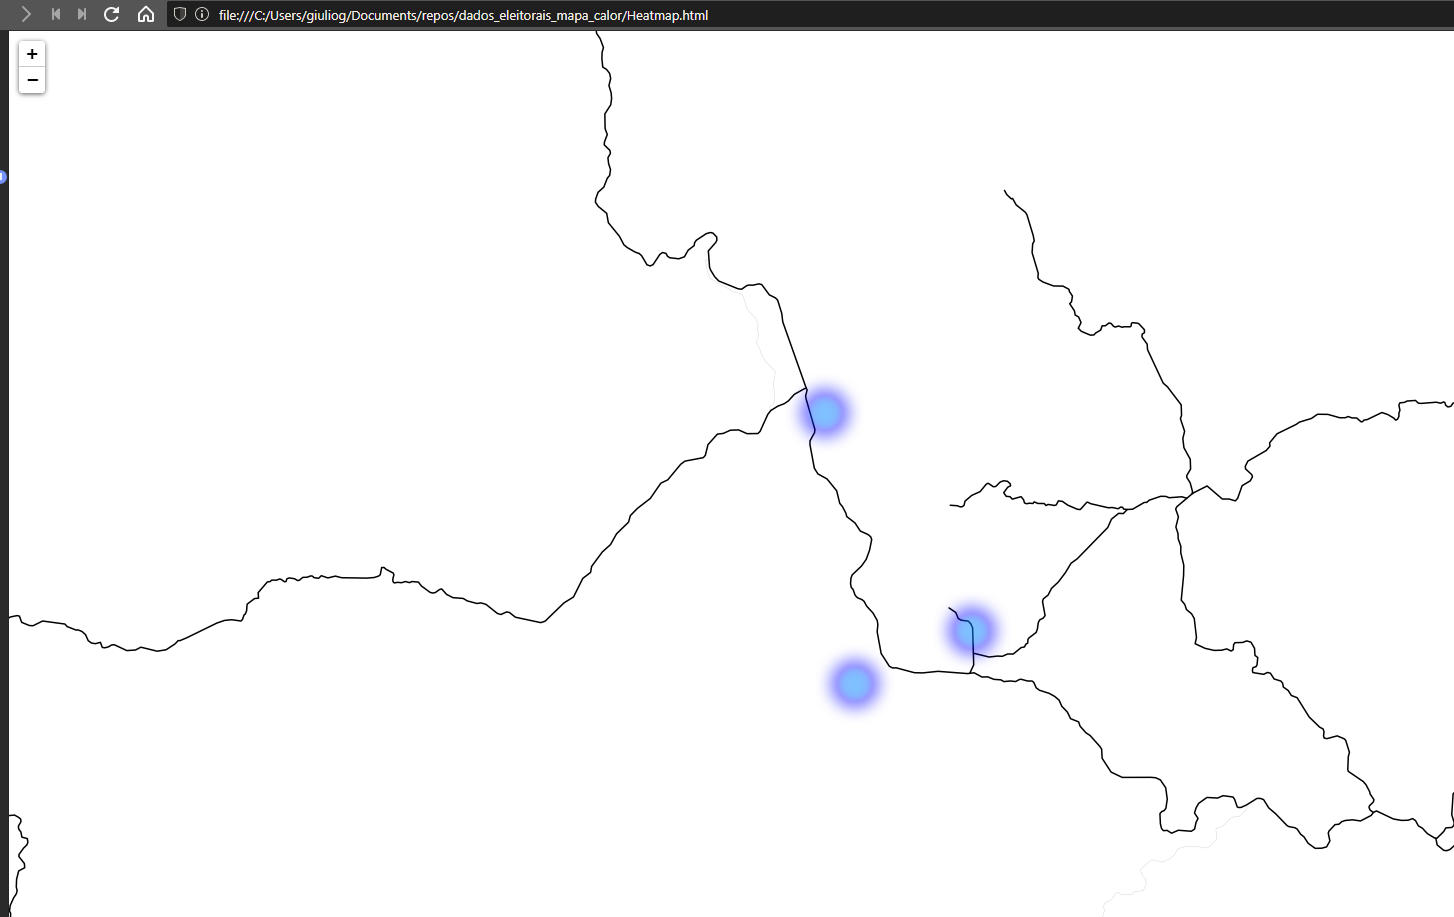